# Pandas: Calculate and plot the Bollinger Bands for a Stock

# What is the Bollinger Bands?
A Bollinger Band® is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security’s price, but which can be adjusted to user preferences.

https://www.investopedia.com/terms/b/bollingerbands.asp
The Bollinger Bands are used to discover if a stock is oversold or overbought. It is called a mean reversion indicator, which measures how far a price swing will stretch before a counter impulse triggers a retracement.

It is a lagging indicator, which is looking at historical background of the current price. Opposed to a leading indicator, which tries to where the price is heading.

# Step 1: Get some time series data on a stock

we will use the Apple stock as example, which has ticker AAPL. You can change to any other stock of your interest by changing the ticker below. To find the ticker of your favorite company/stock you can use Yahoo! Finance ticker lookup.

To get some time series of stock data we will use the Pandas-datareader library to collect it from Yahoo! Finance.

In [2]:
!pip install pandas_datareader

     ------------------------------------ 109.5/109.5 kB 703.7 kB/s eta 0:00:00


In [3]:
import pandas_datareader as pdr
import datetime as dt

ticker = pdr.get_data_yahoo("AAPL", dt.datetime(2020, 1, 1), dt.datetime.now())[['Close', 'High', 'Low']]
print(ticker)

                 Close        High         Low
Date                                          
2019-12-31   73.412498   73.419998   72.379997
2020-01-02   75.087502   75.150002   73.797501
2020-01-03   74.357498   75.144997   74.125000
2020-01-06   74.949997   74.989998   73.187500
2020-01-07   74.597504   75.224998   74.370003
...                ...         ...         ...
2022-06-21  135.869995  137.059998  133.320007
2022-06-22  135.350006  137.759995  133.910004
2022-06-23  138.270004  138.589996  135.630005
2022-06-24  141.660004  141.910004  139.770004
2022-06-27  141.660004  143.490005  140.970001

[627 rows x 3 columns]


We will use the Close, High and Low columns to do the further calculations.

# Step 2: How are the Bollinger Bands calculated

we can refer to Investopedia.org to get the answer, which states that the Bollinger Bands are calculated as follows.

BOLU=MA(TP,n)+m∗σ[TP,n]

BOLD=MA(TP,n)−m∗σ[TP,n]

Where BOLU is the Upper Bollinger Band and BOLD is Lower Bollinger Band. The MA is the Moving Average. The TP and σ are calculated as follows.

TP (typical price)=(High+Low+Close)÷3

σ[TP,n] = Standard Deviation over last n periods of TP​

Where n is the number of days in smoothing period (typically 20), and m is the number of standard deviations (typically 2).

# Step 3: Calculate the Bollinger Bands

This is straight forward. We start by calculating the typical price TP and then the standard deviation over the last 20 days (the typical value). Then we calculate the simple moving average of rolling over the last 20 days (the typical value). Then we have the values to calculate the upper and lower values of the Bolling Bands (BOLU and BOLD).

In [4]:
ticker['TP'] = (ticker['Close'] + ticker['Low'] + ticker['High'])/3
ticker['std'] = ticker['TP'].rolling(20).std(ddof=0)
ticker['MA-TP'] = ticker['TP'].rolling(20).mean()
ticker['BOLU'] = ticker['MA-TP'] + 2*ticker['std']
ticker['BOLD'] = ticker['MA-TP'] - 2*ticker['std']
print(ticker)

                 Close        High         Low          TP       std  \
Date                                                                   
2019-12-31   73.412498   73.419998   72.379997   73.070831       NaN   
2020-01-02   75.087502   75.150002   73.797501   74.678335       NaN   
2020-01-03   74.357498   75.144997   74.125000   74.542498       NaN   
2020-01-06   74.949997   74.989998   73.187500   74.375832       NaN   
2020-01-07   74.597504   75.224998   74.370003   74.730835       NaN   
...                ...         ...         ...         ...       ...   
2022-06-21  135.869995  137.059998  133.320007  135.416667  6.444177   
2022-06-22  135.350006  137.759995  133.910004  135.673335  6.564290   
2022-06-23  138.270004  138.589996  135.630005  137.496668  6.607310   
2022-06-24  141.660004  141.910004  139.770004  141.113337  6.604865   
2022-06-27  141.660004  143.490005  140.970001  142.040003  6.606692   

                 MA-TP        BOLU        BOLD  
Date          

Note, that if you compare you results with Yahoo! Finance for Apple, there will be some small difference. The reason is, that they by default use TP to be closing price and not the average of the Close, Low and High. If you change TP to equal Close only, you will get the same figures as they do.

# Step 4: Plotting it on a graph

Plotting the three lines is straight forward by using plot() on the DataFrame. Making an filled area with color between BOLU and BOLD can be achieved by using fill_between().

This results in the full program to be.

                 Close        High         Low          TP       std  \
Date                                                                   
2020-01-29   81.084999   81.962502   80.345001   81.130834  2.226784   
2020-01-30   80.967499   81.022499   79.687500   80.559166  2.070278   
2020-01-31   77.377502   80.669998   77.072502   78.373334  1.934957   
2020-02-03   77.165001   78.372498   75.555000   77.030833  1.776701   
2020-02-04   79.712502   79.910004   78.407501   79.343335  1.557056   
...                ...         ...         ...         ...       ...   
2022-06-21  135.869995  137.059998  133.320007  135.416667  6.444177   
2022-06-22  135.350006  137.759995  133.910004  135.673335  6.564290   
2022-06-23  138.270004  138.589996  135.630005  137.496668  6.607310   
2022-06-24  141.660004  141.910004  139.770004  141.113337  6.604865   
2022-06-27  141.660004  143.490005  140.970001  142.040003  6.606692   

                 MA-TP        BOLU        BOLD  
Date          

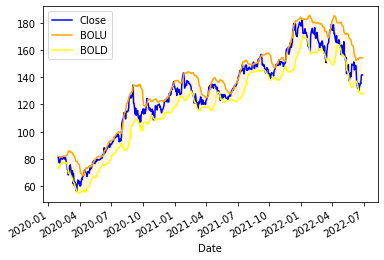

In [5]:
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt

ticker = pdr.get_data_yahoo("AAPL", dt.datetime(2020, 1, 1), dt.datetime.now())[['Close', 'High', 'Low']]
# Boillinger band calculations
ticker['TP'] = (ticker['Close'] + ticker['Low'] + ticker['High'])/3
ticker['std'] = ticker['TP'].rolling(20).std(ddof=0)
ticker['MA-TP'] = ticker['TP'].rolling(20).mean()
ticker['BOLU'] = ticker['MA-TP'] + 2*ticker['std']
ticker['BOLD'] = ticker['MA-TP'] - 2*ticker['std']
ticker = ticker.dropna()
print(ticker)
# Plotting it all together
ax = ticker[['Close', 'BOLU', 'BOLD']].plot(color=['blue', 'orange', 'yellow'])
ax.fill_between(ticker.index, ticker['BOLD'], ticker['BOLU'], facecolor='orange', alpha=0.1)
plt.show()

# Step 5: How to use the Bollinger Band Indicator?

If the stock price are continuously touching the upper Bollinger Band (BOLU) the market is thought to be overbought. While if the price continuously touches the lower Bollinger Band (BOLD) the market is thought to be oversold.

The more volatile the market is, the wider the upper and lower band will be. Hence, it also indicates how volatile the market is at a given period.
The volatility measured by the Bollinger Band is referred to as a squeeze when the upper and lower band are close. This is considered to be a sign that there will be more volatility in the coming future, which opens up for possible trading opportunities.

A common misconception of the bands are that when the price outbreaks the the bounds of the upper and lower band, it is a trading signal. This is not the case.

As with all trading indicators, it should not be used alone to make trading decisions.